D:\GitHub\GDS_py_TDY_venv\.venv\Lib\site-packages\scipy\sparse\_construct.py:543: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
Note: In Python 3.11, this warning can be generated by a call of scipy.sparse.diags(), but the code indicated in the warning message will refer to an internal call of scipy.sparse.diags_array(). If that happens, check your code for the use of diags().
  A = diags_array(diagonals, offsets=offsets, shape=shape, dtype=dtype)


21:18:11 Hora est. Pacífico, Sudamérica WARNING: Mode field at frequency index  
                                        0, mode index 3 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 4 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 5 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 6 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 7 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 8 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 9 does not decay at the   
                                        plane boundaries.                       

D:\GitHub\GDS_py_TDY_venv\.venv\Lib\site-packages\scipy\sparse\_construct.py:543: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
Note: In Python 3.11, this warning can be generated by a call of scipy.sparse.diags(), but the code indicated in the warning message will refer to an internal call of scipy.sparse.diags_array(). If that happens, check your code for the use of diags().
  A = diags_array(diagonals, offsets=offsets, shape=shape, dtype=dtype)


21:18:12 Hora est. Pacífico, Sudamérica WARNING: Mode field at frequency index  
                                        0, mode index 2 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 3 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 4 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 5 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 6 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 7 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 8 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 9 does not decay at the   
                                        plane boundaries.                       

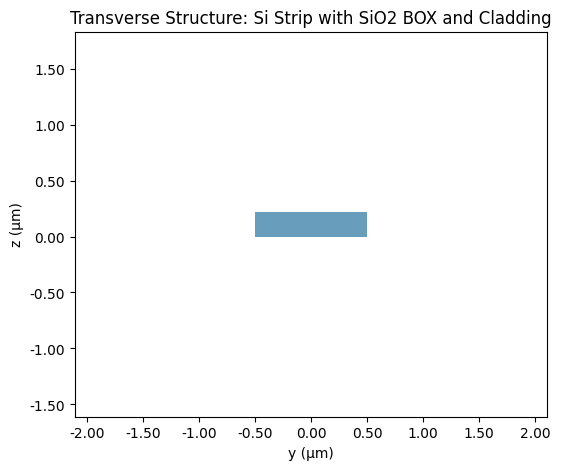

D:\GitHub\GDS_py_TDY_venv\.venv\Lib\site-packages\scipy\sparse\_construct.py:543: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
Note: In Python 3.11, this warning can be generated by a call of scipy.sparse.diags(), but the code indicated in the warning message will refer to an internal call of scipy.sparse.diags_array(). If that happens, check your code for the use of diags().
  A = diags_array(diagonals, offsets=offsets, shape=shape, dtype=dtype)


21:18:13 Hora est. Pacífico, Sudamérica WARNING: Mode field at frequency index  
                                        0, mode index 5 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 6 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 7 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 8 does not decay at the   
                                        plane boundaries.                       

                                        WARNING: Mode field at frequency index  
                                        0, mode index 9 does not decay at the   
                                        plane boundaries.                       

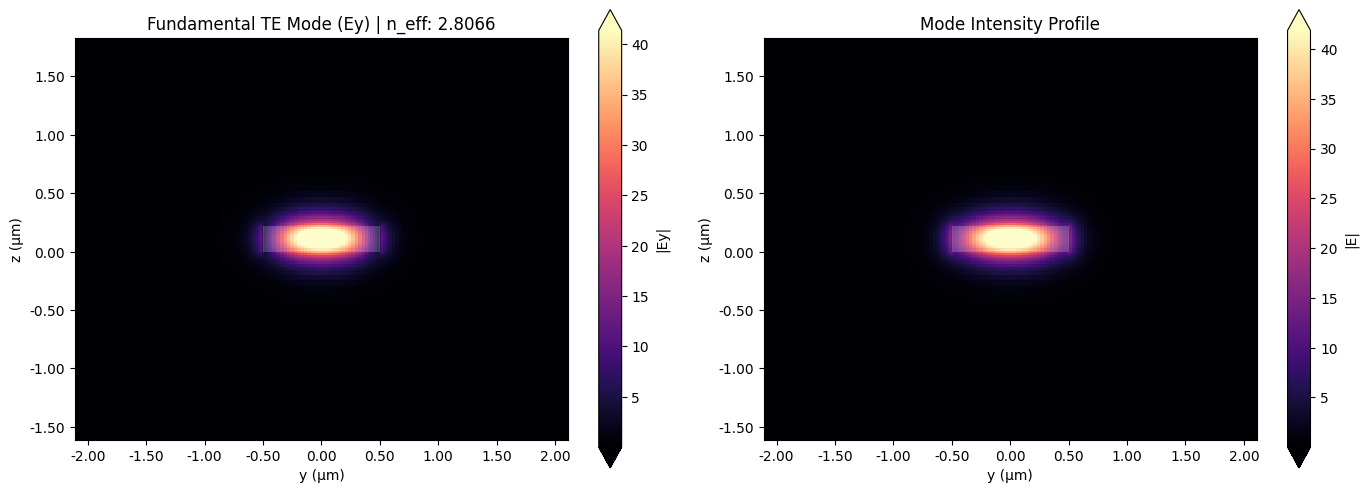

Mode 0: n_eff = 2.0680
Mode 1: n_eff = 1.7599
Mode 2: n_eff = 1.4272
Mode 3: n_eff = 1.3942
Mode 4: n_eff = 1.3847
Mode 5: n_eff = 1.3771
Mode 6: n_eff = 1.3687
Mode 7: n_eff = 1.3428
Mode 8: n_eff = 1.3327
Mode 9: n_eff = 1.3228
--- Results for Width 1.0um ---
Found 3 guided TE modes: [2.80657394 2.47886451 1.87274775]
Found 2 guided TM modes: [2.06804662 1.75989652]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
from tidy3d.plugins import waveguide
from tidy3d.plugins.mode import ModeSolver

# --- 1. Material Definitions ---
# Using fixed indices for 1550nm for simplicity
n_si = 3.48
n_sio2 = 1.444

mat_si = td.Medium(permittivity=n_si**2)
mat_sio2 = td.Medium(permittivity=n_sio2**2)


def get_guided_modes(pol_type, width=0.48, thickness=0.22):
    """
    Separates TE/TM using Symmetry and counts only guided modes.
    """
    # For a waveguide centered vertically:
    # TE (Ey dominant): Z-Symmetry is Even (1)
    # TM (Ez dominant): Z-Symmetry is Odd (-1)
    # Note: We assume the waveguide is centered at z = thickness/2
    sym_z = 1 if pol_type == 'TE' else -1

    # Define the Plugin
    wg_plugin = waveguide.RectangularDielectric(
        wavelength=1.55,
        core_width=width,
        core_thickness=thickness,
        core_medium=mat_si,
        clad_medium=mat_sio2,
        box_medium=mat_sio2,
        mode_spec=td.ModeSpec(num_modes=10, target_neff=n_si) # Ask for many
    )

    # Correct way to get the simulation and apply symmetry
    # We access the simulation through the internal mode_solver
    sim_base = wg_plugin.mode_solver.simulation
    sym_sim = sim_base.copy(update={"symmetry": (0, 0, sym_z)})

    # Re-initialize the solver with the symmetric simulation
    solver = ModeSolver(
        simulation=sym_sim,
        plane=wg_plugin.mode_solver.plane,
        mode_spec=wg_plugin.mode_solver.mode_spec,
        freqs=wg_plugin.mode_solver.freqs
    )

    data = solver.solve()

    # Filter for guided modes only (n_eff > n_cladding)
    # squeeze() handles the frequency dimension
    n_effs = data.n_eff.values.squeeze()
    guided_indices = np.where(n_effs > n_sio2)[0]

    return wg_plugin,n_effs[guided_indices], data



# --- 2. Execution ---
w_test = 1.0  # Testing a multimode width

_ ,te_neffs, te_data = get_guided_modes('TE', width=w_test)
strip_waveguide,tm_neffs, tm_data = get_guided_modes('TM', width=w_test)

# --- 3. Structure Visualization ---
# We plot the cross-section to verify materials and dimensions
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
strip_waveguide.plot_structures(x=0, ax=ax)
plt.title("Transverse Structure: Si Strip with SiO2 BOX and Cladding")
plt.show()

# --- 5. Plotting Results for TE Light ---
# Mode index 0 is typically the fundamental Quasi-TE mode
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Ey field (dominant component for TE in this orientation)
strip_waveguide.plot_field("Ey", "abs", mode_index=0, ax=axs[0])
axs[0].set_title(f"Fundamental TE Mode (Ey) | n_eff: {float(te_data.n_eff.values[0][0]):.4f}")

# Plot E-field absolute intensity
strip_waveguide.plot_field("E", "abs", mode_index=0, ax=axs[1])
axs[1].set_title("Mode Intensity Profile")

plt.tight_layout()
plt.show()

# Print out the effective indices for all solved modes
for i, neff in enumerate(tm_data.n_eff.values[0]):
    print(f"Mode {i}: n_eff = {neff:.4f}")



# --- 3. Results ---
print(f"--- Results for Width {w_test}um ---")
print(f"Found {len(te_neffs)} guided TE modes: {te_neffs}")
print(f"Found {len(tm_neffs)} guided TM modes: {tm_neffs}")